In [1]:
import numpy
import matplotlib.pyplot as plt
from math import *

In [2]:
def chi2(mu_exp,e_exp,mu_obs,e_obs,mcov):
    mcov_inv = numpy.linalg.inv(mcov)
    
    ediff = e_exp-e_obs
    mudiff = mu_exp-mu_obs
    chi2 = ediff*mcov_inv[0,0]*ediff + 2*ediff*mcov_inv[0,1]*mudiff + mudiff*mcov_inv[1,1]*mudiff
    return chi2

def mcov_total(mu_exp,e_exp,
               mu_xsec_err,e_xsec_err,xsec_corr,
               mu_reco_err,e_reco_err,reco_corr):
    
    mcov_stat_e_err = numpy.matrix([[e_exp, 0],[0,0]])
    mcov_stat_mu_err = numpy.matrix([[0, 0],[0,mu_exp]])
    mcov_stat_err = mcov_stat_e_err + mcov_stat_mu_err
    
    mcov_xsec_err = numpy.matrix([[e_xsec_err*e_xsec_err,
                                   xsec_corr*e_xsec_err*mu_xsec_err],
                                  [xsec_corr*e_xsec_err*mu_xsec_err,
                                   mu_xsec_err*mu_xsec_err]])
    mcov_reco_err = numpy.matrix([[e_reco_err*e_reco_err,
                                   reco_corr*e_reco_err*mu_reco_err],
                                  [reco_corr*e_reco_err*mu_reco_err,
                                   mu_reco_err*mu_reco_err]])
    
    mcov_total = mcov_stat_err+mcov_xsec_err+mcov_reco_err
    
    return mcov_total

def calc_chi2_base(mu_exp,e_exp,mu_obs,e_obs,
                   mu_xsec_frac_err,e_xsec_frac_err,xsec_corr,
                   mu_reco_frac_err,e_reco_frac_err,reco_corr):

    mcov = mcov_total(mu_exp,e_exp,
                      mu_xsec_frac_err*mu_exp,
                      e_xsec_frac_err*e_exp,
                      xsec_corr,
                      mu_reco_frac_err*mu_exp,
                      e_reco_frac_err*e_exp,
                      reco_corr)
    return chi2(mu_exp=mu_exp,e_exp=e_exp,
                mu_obs=mu_obs,e_obs=e_obs,
                mcov=mcov)

In [3]:
config = { 'mu_exp': 10000,
           'e_exp': 100,
           'mu_xsec_frac_err': 0.1,
           'mu_reco_frac_err': 0.05,
           'e_reco_frac_err': 0.,
           'e_xsec_frac_err': 0.1,
           'xsec_corr': 1.0,
           'reco_corr': 0.0,
           'mu_obs': 10000,
           'e_obs':100}
print config

{'mu_exp': 10000, 'e_exp': 100, 'e_obs': 100, 'mu_obs': 10000, 'e_xsec_frac_err': 0.1, 'mu_xsec_frac_err': 0.1, 'mu_reco_frac_err': 0.05, 'reco_corr': 0.0, 'xsec_corr': 1.0, 'e_reco_frac_err': 0.0}


In [4]:
calc_chi2_base(**config)

0.0

In [5]:
def fill_chi2(input_arr,var_names,**kwargs):
    chi2_arr = []
    my_config = kwargs.copy()
    for val in input_arr:
        for var in var_names:
            my_config[var] = val
        chi2_arr.append(calc_chi2_base(**my_config))
    return chi2_arr

In [6]:
e_obs_arr = numpy.arange(50,150,2.0)

In [7]:
c_base = { 'mu_exp': 10000,
           'e_exp': 100,
           'mu_xsec_frac_err': 0.1,
           'mu_reco_frac_err': 0.05,
           'e_reco_frac_err': 0.,
           'e_xsec_frac_err': 0.1,
           'xsec_corr': 1.0,
           'reco_corr': 0.0,
           'mu_obs': 10000,
           'e_obs':100 }
c_base_9500 = c_base.copy(); c_base_9500['mu_obs']=9500;
c_base_10500 = c_base.copy(); c_base_10500['mu_obs']=10500;


In [8]:
plt.rcParams['figure.figsize'] = [10, 10]

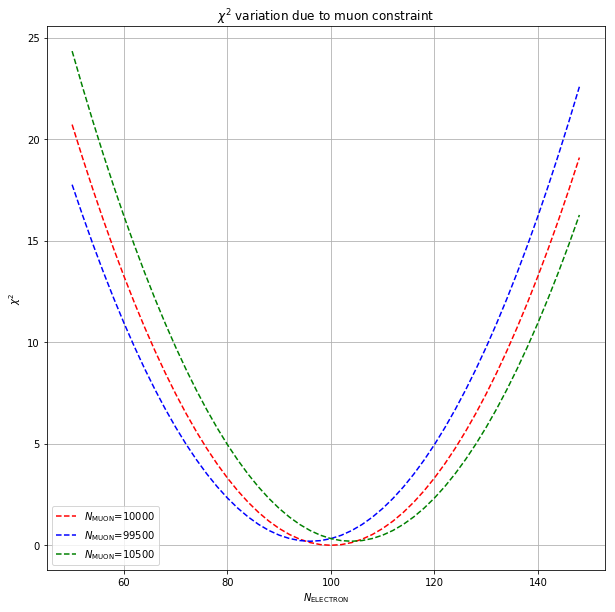

In [9]:
plt.ylabel('$\chi^2$')
plt.xlabel('$N_{\mathregular{ELECTRON}}$')
plt.grid(True)
lines = plt.plot(e_obs_arr,fill_chi2(input_arr=e_obs_arr,var_names=['e_obs'],**c_base),"r--",
                 e_obs_arr,fill_chi2(input_arr=e_obs_arr,var_names=['e_obs'],**c_base_9500),"b--",
                 e_obs_arr,fill_chi2(input_arr=e_obs_arr,var_names=['e_obs'],**c_base_10500),"g--")
plt.title('$\chi^2$ variation due to muon constraint')
plt.legend(['$N_{\mathregular{MUON}}$=10000',
            '$N_{\mathregular{MUON}}$=99500',
            '$N_{\mathregular{MUON}}$=10500',]
          );

In [10]:
reco_err_arr = numpy.arange(0.0,0.5,0.01)

In [11]:
c_base = { 'mu_exp': 10000,
           'e_exp': 100,
           'mu_xsec_frac_err': 0.1,
           'mu_reco_frac_err': 0.05,
           'e_reco_frac_err': 0.,
           'e_xsec_frac_err': 0.1,
           'xsec_corr': 1.0,
           'reco_corr': 0.0,
           'mu_obs': 10000,
           'e_obs':100 }
c_base_high_5 = c_base.copy(); c_base_high_5['mu_obs']=10500; c_base_high_5['e_obs']=105;
c_base_high_10 = c_base.copy(); c_base_high_10['mu_obs']=11000; c_base_high_10['e_obs']=110;

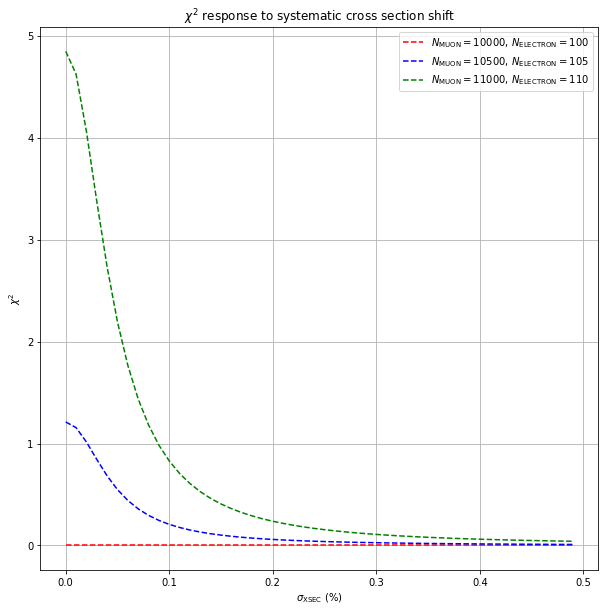

In [12]:
plt.ylabel('$\chi^2$')
plt.xlabel('$\sigma_{\mathregular{XSEC}}$ (%)')
plt.grid(True)
lines = plt.plot(reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base),"r--",
                 reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base_high_5),"b--",
                 reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base_high_10),"g--",)
plt.title('$\chi^2$ response to systematic cross section shift')
plt.legend(['$N_{\mathregular{MUON}}=10000$, $N_{\mathregular{ELECTRON}}=100$',
            '$N_{\mathregular{MUON}}=10500$, $N_{\mathregular{ELECTRON}}=105$',
            '$N_{\mathregular{MUON}}=11000$, $N_{\mathregular{ELECTRON}}=110$']            
          );

In [13]:
c_base = { 'mu_exp': 10000,
           'e_exp': 100,
           'mu_xsec_frac_err': 0.1,
           'mu_reco_frac_err': 0.05,
           'e_reco_frac_err': 0.,
           'e_xsec_frac_err': 0.1,
           'xsec_corr': 1.0,
           'reco_corr': 0.0,
           'mu_obs': 11000,
           'e_obs':100 }
c_base_mureco_2 = c_base.copy(); c_base_mureco_2['mu_reco_frac_err']=0.02;
c_base_mureco_10 = c_base.copy(); c_base_mureco_10['mu_reco_frac_err']=0.10;

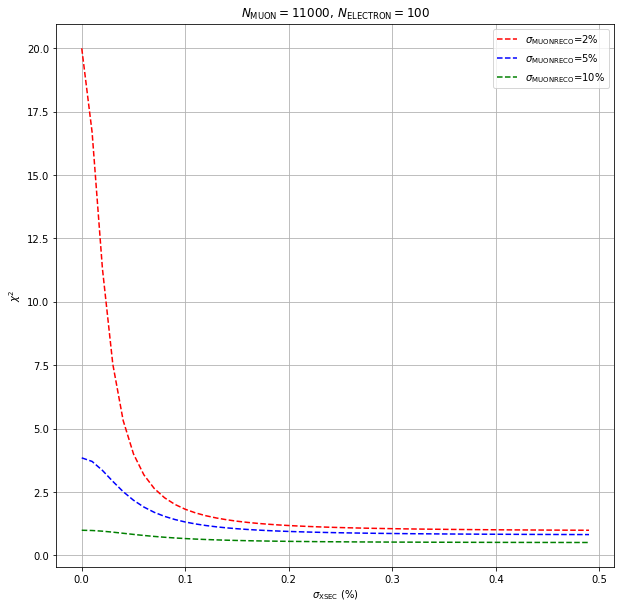

In [14]:
plt.ylabel('$\chi^2$')
plt.xlabel('$\sigma_{\mathregular{XSEC}}$ (%)')
plt.grid(True)
lines = plt.plot(reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base_mureco_2),"r--",
                 reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base),"b--",
                 reco_err_arr,fill_chi2(input_arr=reco_err_arr,
                                        var_names=['mu_xsec_frac_err','e_xsec_frac_err'],
                                        **c_base_mureco_10),"g--",)
plt.title('$N_{\mathregular{MUON}}=11000$, $N_{\mathregular{ELECTRON}}=100$')
plt.legend(['$\sigma_{\mathregular{MUON RECO}}$=2%',
            '$\sigma_{\mathregular{MUON RECO}}$=5%',
            '$\sigma_{\mathregular{MUON RECO}}$=10%']
          );